In [1]:
#pip install gensim==4.3.0


In [2]:
import gensim
gensim.__version__

'4.3.0'

In [3]:
!pip install konlpy
!pip install mecab-python

In [4]:
from google.colab import drive
drive.mount('/content/my_home')


Drive already mounted at /content/my_home; to attempt to forcibly remount, call drive.mount("/content/my_home", force_remount=True).


In [5]:
#from konlpy.tag import Mecab
#mecab = Mecab()

# 1. 데이터 로드

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [7]:
#nltk.download('stopwords')
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [8]:
df = pd.read_csv("/content/my_home/MyDrive/Colab Notebooks/Result.csv", encoding='utf-8')
column_name = ['index', 'place', 'information', 'category']

data = df.values.tolist()

df = pd.DataFrame(data, columns=column_name)
df

,index,place,information,category
0,16,광화문광장,조선 태조는 1394년에 도읍을 한양으로 옮기고 정국인 경복궁을 지었다. 그리고 궁...,랜드마크
1,17,63스퀘어,"여의도 63빌딩은 볼거리, 먹을거리, 즐길거리 등을 갖춘 복합 공간이다. 빌딩의 맨...",랜드마크
2,18,서울광장,서울에서 신발을 벗고 걸을 수 있는 곳. 따스한 햇살을 이불 삼아 낮잠을 청할 수 ...,랜드마크
3,19,세빛섬,‘한강을 아름답게 밝혀주는 세 개의 빛나는 섬’이란 의미를 지닌 세빛섬은 세계 최초...,랜드마크
4,20,국회의사당,여의도에 위치한 국회의사당은 한국의 민주주의와 인권을 상징하는 건물이다. 국회의사당...,랜드마크
...,...,...,...,...
1897,1913,[백년가게] 시골감자국,김이 모락모락 나는 국물에서는 진한 육수만의 깊은 맛과 구수한 향이 코를 자극하며 ...,백년가게
1898,1914,[백년가게] 삼천포식당,"달궈진 돌판 위에 고기가 올라서면 옅은 연기, 치이익 소리와 함께 기분 좋은 냄새가...",백년가게
1899,1915,[백년가게] 엘리제과자점,엘리제과자점은 21세에 제빵계에 입문해 38년간 경쟁력을 키워온 제과 국가대표의 모...,백년가게
1900,1916,[백년가게] 평양옥,평양옥은 맑고 깊은 닭곰탕으로 서대문을 대표하는 맛집이다. 대표자가 어머님에게 물려...,백년가게


In [9]:
print('전체 문서의 수 :',len(df))

전체 문서의 수 : 1902


In [10]:

print('NULL 값 존재 유무 :', df.isnull().values.any())

df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print('NULL 값 존재 유무 :', df.isnull().values.any()) # Null 값이 존재하는지 확인

NULL 값 존재 유무 : True
NULL 값 존재 유무 : False


In [11]:
df['information'] = df['information'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['information']

<ipython-input-11-4239b0d319d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['information'] = df['information'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-11-4239b0d319d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['information'] = df['information'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0       조선 태조는 년에 도읍을 한양으로 옮기고 정국인 경복궁을 지었다 그리고 궁의 정문인...
1       여의도 빌딩은 볼거리 먹을거리 즐길거리 등을 갖춘 복합 공간이다 빌딩의 맨 꼭대기 ...
2       서울에서 신발을 벗고 걸을 수 있는 곳 따스한 햇살을 이불 삼아 낮잠을 청할 수 있...
3       한강을 아름답게 밝혀주는 세 개의 빛나는 섬이란 의미를 지닌 세빛섬은 세계 최초의 ...
4       여의도에 위치한 국회의사당은 한국의 민주주의와 인권을 상징하는 건물이다 국회의사당 ...
                              ...                        
1897    김이 모락모락 나는 국물에서는 진한 육수만의 깊은 맛과 구수한 향이 코를 자극하며 ...
1898    달궈진 돌판 위에 고기가 올라서면 옅은 연기 치이익 소리와 함께 기분 좋은 냄새가 ...
1899    엘리제과자점은 세에 제빵계에 입문해 년간 경쟁력을 키워온 제과 국가대표의 모든 역량...
1900    평양옥은 맑고 깊은 닭곰탕으로 서대문을 대표하는 맛집이다 대표자가 어머님에게 물려받...
1901    포도나무는 대표적인 남도 토속음식 중 하나인 짱뚱어탕을 년째 고수하고 있는 짱뚱어탕...
Name: information, Length: 1898, dtype: object

In [12]:
okt = Okt()

tokenized_data = []
for sentence in tqdm(df['information']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 1898/1898 [00:42<00:00, 44.20it/s] 


In [13]:
print(tokenized_data[:3])


[['조선', '태조', '년', '도읍', '을', '한양', '옮기다', '정국', '인', '경복궁', '을', '지다', '그리고', '궁', '정문', '인', '광화문', '앞', '길', '좌우', '의정부', '포함', '육조', '관아', '거리', '건설', '한양', '최고', '길', '이다', '년', '그', '길이', '다시', '열리다', '광화문', '에서', '청계', '광장', '이르다', '광장', '들어서다', '것', '이다', '광장', '크게', '광화문', '역사', '회복하다', '광장', '육', '조', '거리', '풍경', '을', '재현', '광장', '한국', '대표', '광장', '시민', '참여', '도시', '문화', '광장', '도심', '속', '광장', '청계천', '연결', '부로'], ['여의도', '빌딩', '볼거리', '먹다', '즐', '길거리', '등', '을', '갖추다', '복합', '공간', '이다', '빌딩', '맨', '꼭대기', '스카이', '텍', '전망', '하나', '만으로', '모든', '걸', '압도', '층', '스카이', '라운지', '워킹', '온', '더', '클라우드', '아름답다', '전망', '을', '보다', '식사', '수', '있다', '이탈리아', '레스토랑', '이다', '층', '위치', '중식', '당', '백리향', '특별하다', '맛', '있다', '곳', '이다', '백리향', '국내', '최초', '로', '철갑상어', '특선', '요리', '개발', '유명하다', '곳', '이다', '스퀘어', '씨월드', '아트', '홀', '카페', '레스토랑', '편의', '시설', '등', '모'], ['서울', '에서', '신발', '을', '벗다', '걸', '을', '수', '있다', '곳', '따스하다', '햇살', '을', '이불', '삼다', '낮잠', '을', '청', '수', '있다', '곳', '바로', '서', '울', '

리뷰의 최대 길이 : 94
리뷰의 평균 길이 : 52.69810326659642


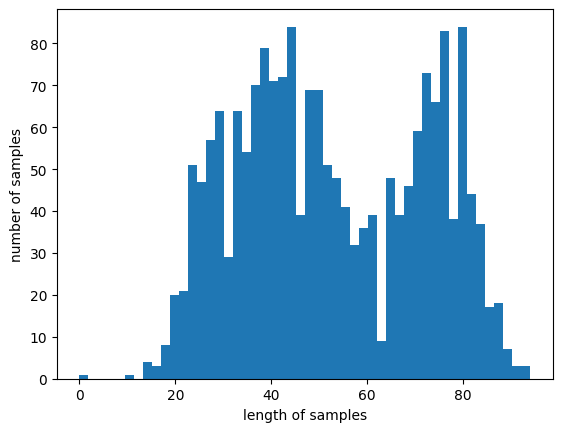

In [14]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
from gensim.models import Word2Vec
model = Word2Vec(tokenized_data, window=5, min_count=5, workers=4, sg=0)

In [16]:
print('완성된 임베딩 매트릭스의 크기 확인 :', model.wv.vectors.shape)


완성된 임베딩 매트릭스의 크기 확인 : (3011, 100)


In [17]:
print(model.wv.most_similar("짱뚱어"))


[('해오다', 0.9967293739318848), ('쓰다', 0.9966186285018921), ('계', 0.9966098070144653), ('점', 0.9965762495994568), ('스콘', 0.996562123298645), ('마다', 0.9965546727180481), ('담기다', 0.996540367603302), ('풍', 0.9965220093727112), ('손맛', 0.9965074062347412), ('할머니', 0.9965026378631592)]


In [18]:
df[:5]

,index,place,information,category
0,16,광화문광장,조선 태조는 년에 도읍을 한양으로 옮기고 정국인 경복궁을 지었다 그리고 궁의 정문인...,랜드마크
1,17,63스퀘어,여의도 빌딩은 볼거리 먹을거리 즐길거리 등을 갖춘 복합 공간이다 빌딩의 맨 꼭대기 ...,랜드마크
2,18,서울광장,서울에서 신발을 벗고 걸을 수 있는 곳 따스한 햇살을 이불 삼아 낮잠을 청할 수 있...,랜드마크
3,19,세빛섬,한강을 아름답게 밝혀주는 세 개의 빛나는 섬이란 의미를 지닌 세빛섬은 세계 최초의 ...,랜드마크
4,20,국회의사당,여의도에 위치한 국회의사당은 한국의 민주주의와 인권을 상징하는 건물이다 국회의사당 ...,랜드마크


In [19]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

# 2. 사전 훈련된 워드 임베딩 사용하기

In [29]:
word2vec_model.corpus_count

1898

In [28]:
word2vec_model = Word2Vec(vector_size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(tokenized_data)
#word2vec_model.intersect_word2vec_format('/content/my_home/MyDrive/Colab Notebooks/ko.bin', lockf=1.0, binary=True)
word2vec_model.train(tokenized_data, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [27]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Word2Vec 모델 초기화
word2vec_model = Word2Vec(vector_size=300, window=5, min_count=2, workers=-1)
word2vec_model.build_vocab(tokenized_data)

# 한국어 워드 임베딩 불러오기
#ko_word_vectors = KeyedVectors.load_word2vec_format('/content/my_home/MyDrive/Colab Notebooks/ko.bin')

# Word2Vec 모델에 한국어 워드 임베딩 추가
#word2vec_model.wv.add(ko_word_vectors)

# 나머지 훈련 코드
word2vec_model.train(tokenized_data, total_examples=word2vec_model.corpus_count, epochs=15)


(0, 0)

# 3. 단어 벡터의 평균 구하기

In [33]:
def get_document_vectors(document_list, word2vec_model):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.key_to_index:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model.wv[word]
                else:
                    doc2vec = doc2vec + word2vec_model.wv[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list


In [35]:
document_embedding_list = get_document_vectors(df['information'],word2vec_model)

In [36]:
print('문서 벡터의 수 :',len(document_embedding_list))

문서 벡터의 수 : 1895


# 4. 추천 시스템 구현하기

In [37]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)

In [38]:
cosine_similarities[0]

array([ 0.99999994,  0.03917111,  0.15269181, ...,  0.00336464,
       -0.11211045,  0.0632601 ], dtype=float32)

In [39]:
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (1895, 1895)


In [81]:
def recommendations(place):
    travel = df[['place', 'category','information']]

    # 책의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장.
    indices = pd.Series(df.index, index = df['place']).drop_duplicates()
    idx = indices[place]

    # 입력된 책과 줄거리(document embedding)가 유사한 책 5개 선정.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]

    # 가장 유사한 책 5권의 인덱스
    travel_indices = [i[0] for i in sim_scores]

    # 전체 데이터프레임에서 해당 인덱스의 행만 추출. 5개의 행을 가진다.
    recommend = travel.iloc[travel_indices].reset_index(drop=True)
    recommend
    recommend.iterrows()
    # 데이터프레임으로부터 순차적 출력
    for index, row in recommend.iterrows():
        #print( row[0],row[1],row[2],'+','\n')
        print(row)

In [80]:
recommendations('반포대교 야경')

매봉산 야경 산 서울 대 야경 명소 중 하나로 선정된 매봉산은 성동구와 용산구에 걸쳐있는 산으로 남산과 연결되어 있어 많은 사람이 산책로 겸 관광의 목적으로도 많이 들르는 곳이다 산에 오르면 정상에 팔각정이 있어서 그곳에서 서울 시내 경치를 볼 수 있다관련 콘텐츠 정보 보기테마코스 서울 야경 어디서 즐기면 좋을까 + 

교보문고 광화문점 문화 매일 많은 사람들이 방문하는 교보문고 광화문점은 다양하고 수많은 책뿐만 아니라 문구류 등 다양한 물품들도 함께 만나 볼 수 있습니다 책을 좋아하는 사람들뿐만 아니라 넓은 매장에서 아이들과 함께 다양한 책들을 구경하고 구매할 수 있어 많은 사람들이 즐겨 찾는 서점이다 실내 데이트나 아이들과 함께 방문할 장소를 찾고 있었다면 책과 문화가 공존하는 교보문고 광화문점을 추천한다  + 

북악스카이웨이 북악팔각정 랜드마크 서울 하늘에 맞닿은 전망대연인들의 데이트 코스로 손꼽히는 북악스카이웨이는 남산서울타워와는 또 다른 각도로 서울 전체를 볼 수 있는 곳이다 년대만 해도 신혼부부들에게 최고의 드라이브 코스를 선사하는 신혼여행지였다 나선형으로 구불구불 이어지는 도로에는 잘 정비된 가로수와 계절마다 피고 지는 다양한 꽃의 향연이 펼쳐진다 빽빽하게 들어선 수풀 사이를 달리는 동안 서울의 하늘길 아래로 시내 전경이 보인다정상에 있는 팔각정에 오르면 산등성이를 + 

북악산 야경 산 북악산은 보안상의 이유로 서울의 많은 산 중에서 가장 늦게 개방되었다 야경 데이트 명소로 주목받는 곳이며 정상에 있는 팔각정에서 서울 시내의 야경을 구경할 수 있다 팔각정 주변에는 산을 따라 산책로가 조성되어있다 + 

부티크모나코 휴식 세련된 인테리어의 부티크모나코는 아방가르드 비즈 펜트하우스라는 독특한 콘셉트의 오피스텔로 유명하다 현대적인 강남의 야경이 매력적으로 한눈에 들어온다 분양을 시작한 지 얼마 되지 않아 모두 팔릴 정도로 인기가 좋았으며 서초를 대표하는 건축물로 자리 잡았다 + 



In [82]:
recommendations("경복궁")

place                                                      벨라프라하
category                                                  카페&디저트
information    핸드드립 커피와 뜨르들르를 맛볼 수 있는 것으로 명소가 된 곳 에스프레소 핸드드립 ...
Name: 0, dtype: object
place                                                       가람국시
category                                                      한식
information    깔끔한 경상도식 국수국시를 전문으로 하는 곳이다 소고기국시와 멸치국시가 인기가 있고...
Name: 1, dtype: object
place                                             아라리오뮤지엄 인 스페이스
category                                                 미술관&박물관
information    아라리오뮤지엄은 아라리오의 창업자인 김창일 회장이 설립한 아트뮤지엄이다 서울에 설립...
Name: 2, dtype: object
place                                                 서소문성지역사박물관
category                                                 미술관&박물관
information    서소문성지역사박물관은 조선 후기 한국 교회사를 한눈에 살펴볼 수 있는 역사박물관이다...
Name: 3, dtype: object
place                                                        파낙스
category                                                      한

In [60]:
recommendations('경복궁')

place        벨라프라하
category    카페&디저트
Name: 0, dtype: object + 조선 태조는 년에 도읍을 한양으로 옮기고 정국인 경복궁을 지었다 그리고 궁의 정문인 광화문 앞 길의 좌우에 의정부를 포함해 육조 관아 거리를 건설했다 한양 최고의 길이었다 년 그 길이 다시 열렸다 광화문에서 청계광장에 이르는 광장이 들어선 것이다 광장은 크게 광화문의 역사를 회복하는 광장 육조거리의 풍경을 재현하는 광장 한국의 대표 광장 시민들이 참여하는 도시문화 광장 도심 속의 광장 청계천 연결부로
place       가람국시
category      한식
Name: 1, dtype: object + 여의도 빌딩은 볼거리 먹을거리 즐길거리 등을 갖춘 복합 공간이다 빌딩의 맨 꼭대기  스카이텍은 전망 하나만으로 모든 걸 압도한다 층 스카이라운지 워킹 온 더 클라우드는 아름다운 전망을 보며 식사를 할 수 있는 이탈리아 레스토랑이다 층에 위치한 중식당 백리향도 특별한 맛이 있는 곳이다 백리향은 국내 최초로 철갑상어 특선 요리를 개발해 유명해진 곳이다 스퀘어는 씨월드 아트홀 카페와 레스토랑 편의 시설등 모
place       아라리오뮤지엄 인 스페이스
category           미술관&박물관
Name: 2, dtype: object + 서울에서 신발을 벗고 걸을 수 있는 곳 따스한 햇살을 이불 삼아 낮잠을 청할 수 있는 곳 바로 서울광장이다 년 월드컵과 함께 시청 앞 광장은 다시 태어났고 지금은 일반 시민들은 물론 서울을 찾는 외국 관광객들에게 서울의 다양한 문화 체험이 가능한 새로운 명소로 자리매김했다 광장은 잔디 상태가 나쁘지 않은 날을 제외하곤 시민들에게 개방된다 잔디광장 옆에는 바닥분수도 준비되어 있다 무더운 여름이면 옷이 젖는 줄도 모르고 깔깔 거리며 뛰어
place       서소문성지역사박물관
category       미술관&박물관
Name: 3, dtype: object + 한강을 아름답게 밝혀주는 세 개의 빛나는 섬이란 의미를